# Breast-Cancer-Wisconsin Data challenge:

## Data:

This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg. 

**Dependant variables** (Number of Attributes): 10

```
1. Sample code number            number
2. Clump Thickness               1 - 10
3. Uniformity of Cell Size       1 - 10
4. Uniformity of Cell Shape      1 - 10
5. Marginal Adhesion             1 - 10
6. Single Epithelial Cell Size   1 - 10
7. Bare Nuclei                   1 - 10
8. Bland Chromatin               1 - 10
9. Normal Nucleoli               1 - 10
10. Mitoses                      1 - 10
```
  
**Predict variable** (desired target): "Class" — has (2 for benign, 4 for malignant)

**Goal:** Develop a model that predicts whether a biopsied breast cell is benign (not harmful) or malignant (cancerous), given a set of attributes about the cell. 

**Hypothesis** 

- Physicians take measurements of different cell characteristics (biopsies of breast) of patients such as size, shape and based on the characteristics they determine if the patient has breast cancer (benign) or not (malignant).
- Null hypothesis is that the 10 attributes have no affect on cancer.
- Alternative hypothesis is that the 10 attributes have affect cancer.

**Results:**
- The dataset is somewhat balanced and duplicated.
- Removing the duplicates (i.e keeping the first) affected the model.
- All the 10 features have found to have predictive power and so were included in the model.
- Logistic Regression classifies breast cells into benign and malignant with 96% accuracy.

In [170]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score

In [171]:
# Since the dataset has not column names. I am creating a list of column names based on the attributes (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original))
columns = ["id", "clump_thickness", "cell_size", "cell_shape", "marginal_adhesion", "epithelial_cell_size", "bare_nuclei", "bland_chromatin", "normal_nucleoli", "mitoses", "class"]

In [172]:
# Load the data
data = pd.read_csv("breast-cancer-wisconsin.data.csv", names=columns)

## Data Exploration

In [173]:
data.describe()

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [174]:
data.shape

(699, 11)

In [175]:
# Check for duplicates
data[data['id'].duplicated()].shape
# Check for a particular duplicated id
data[data['id'] == 1033078]

(54, 11)

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [176]:
# Drop duplicates, keeping the first one only
data.drop_duplicates(subset ="id", keep = 'first', inplace = True)
data[data['id'] == 1033078]

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
8,1033078,2,1,1,1,2,1,1,1,5,2


In [177]:
data.describe()

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.450000e+02,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1.074419e+06,4.471318,3.182946,3.269767,2.893023,3.275969,3.497674,2.955039,1.613953,2.719380
std,6.372627e+05,2.858115,3.059049,2.985748,2.918036,2.247455,2.459374,3.120682,1.744056,0.960564
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.715490e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,2.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238186e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


id                      0
clump_thickness         0
cell_size               0
cell_shape              0
marginal_adhesion       0
epithelial_cell_size    0
bare_nuclei             0
bland_chromatin         0
normal_nucleoli         0
mitoses                 0
class                   0
dtype: int64

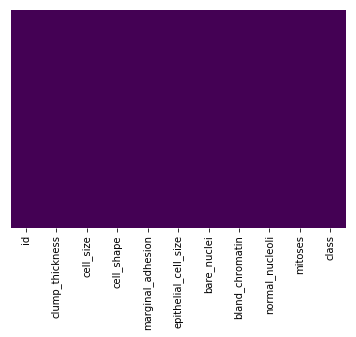

In [178]:
# Check missing values (na's) visually
sns.heatmap(data = data.isnull(), yticklabels=False, cbar=False, cmap='viridis');
# Check the missing values (na's)
data.isna().sum()

In [179]:
# Change labels from 2 and 4 to 0 and 1 respectively
labels = {2: 0, 4: 1}
data["class"] = data["class"].apply(lambda x: labels[x])
# Replace '?' with na's
data["bare_nuclei"] = data["bare_nuclei"].replace('?', np.nan)
# Check the na's
data["bare_nuclei"].isna().sum()

16

In [180]:
# Fill na's with median
data["bare_nuclei"] = data["bare_nuclei"].fillna(data["bare_nuclei"].median())
# Convert object type to integer
data['bare_nuclei'] = data['bare_nuclei'].astype('int64')
# Check the na's
data["bare_nuclei"].isna().sum()

0

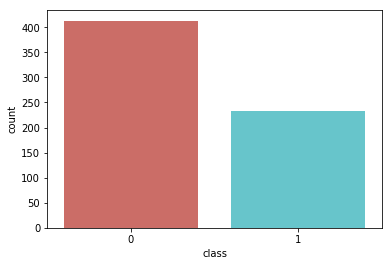

In [181]:
# Counts for each class
data["class"].value_counts()
# Counts plot for the classes
sns.countplot(x = "class", data = data, palette='hls');

In [182]:
class_0 = len(data[data['class'] == 0])
class_1 = len(data[data['class'] == 1])
class_0_pct = class_0/(class_0+class_1) * 100
class_1_pct = class_1/(class_0+class_1) * 100
print("Perecentage of Benign class:", round(class_0_pct, 2))
print("Perecentage of Benign class:", round(class_1_pct, 2))

Perecentage of Benign class: 64.03
Perecentage of Benign class: 35.97


### Our classes are imbalanced, and the ratio of benign to malignant instances is 64:35. Before we go ahead to balance the classes, let’s do some more exploration.

In [183]:
# Groupby class
data.groupby('class').mean()

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
class,,,,,,,,,,
0,1.112947e+06,2.920097,1.309927,1.445521,1.363196,2.133172,1.326877,2.106538,1.295400,1.065375
1,1.005831e+06,7.232759,6.517241,6.517241,5.616379,5.310345,7.534483,5.974138,5.909483,2.590517


### Check the prediction power of each feature

In [184]:
def plot_feature_predict(feature, title):
    table = pd.crosstab(data[feature], data['class'])
    table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True);
    plt.title(title + " vs Cancer type");
    plt.show()

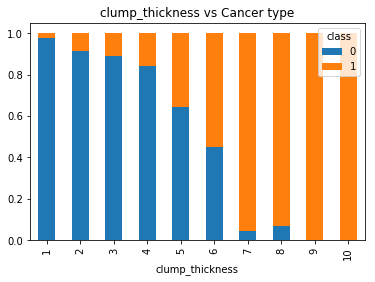

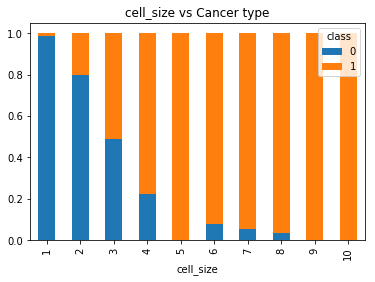

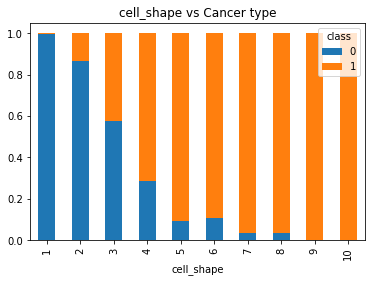

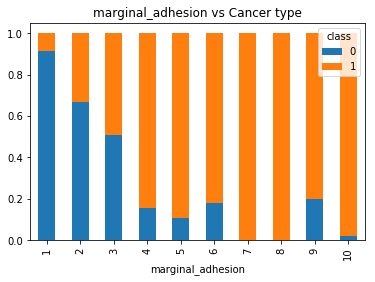

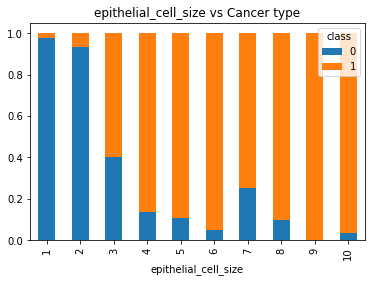

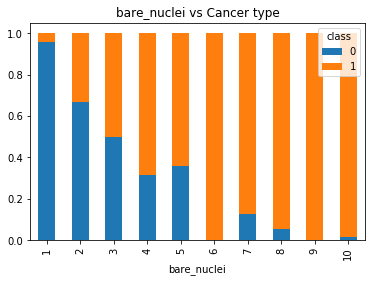

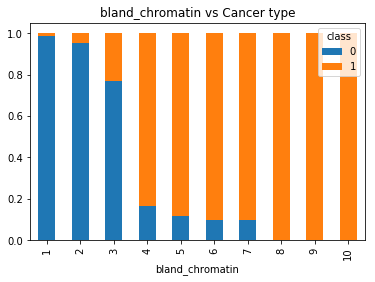

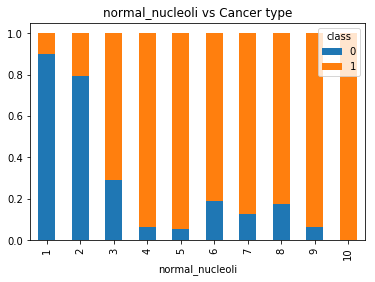

In [185]:
#creating a crosstab stacked bar chart variable
int_columns = list(data.columns[1:9])
for i in int_columns:
    title = str(i)
    plot_feature_predict(feature=title, title=title)

The stacked bar chart above displays the proportion of 1’s to 0’s as the values of 9 different attributes increase. We can intuitively determine there likely is predictive knowledge to be gained from these attributes

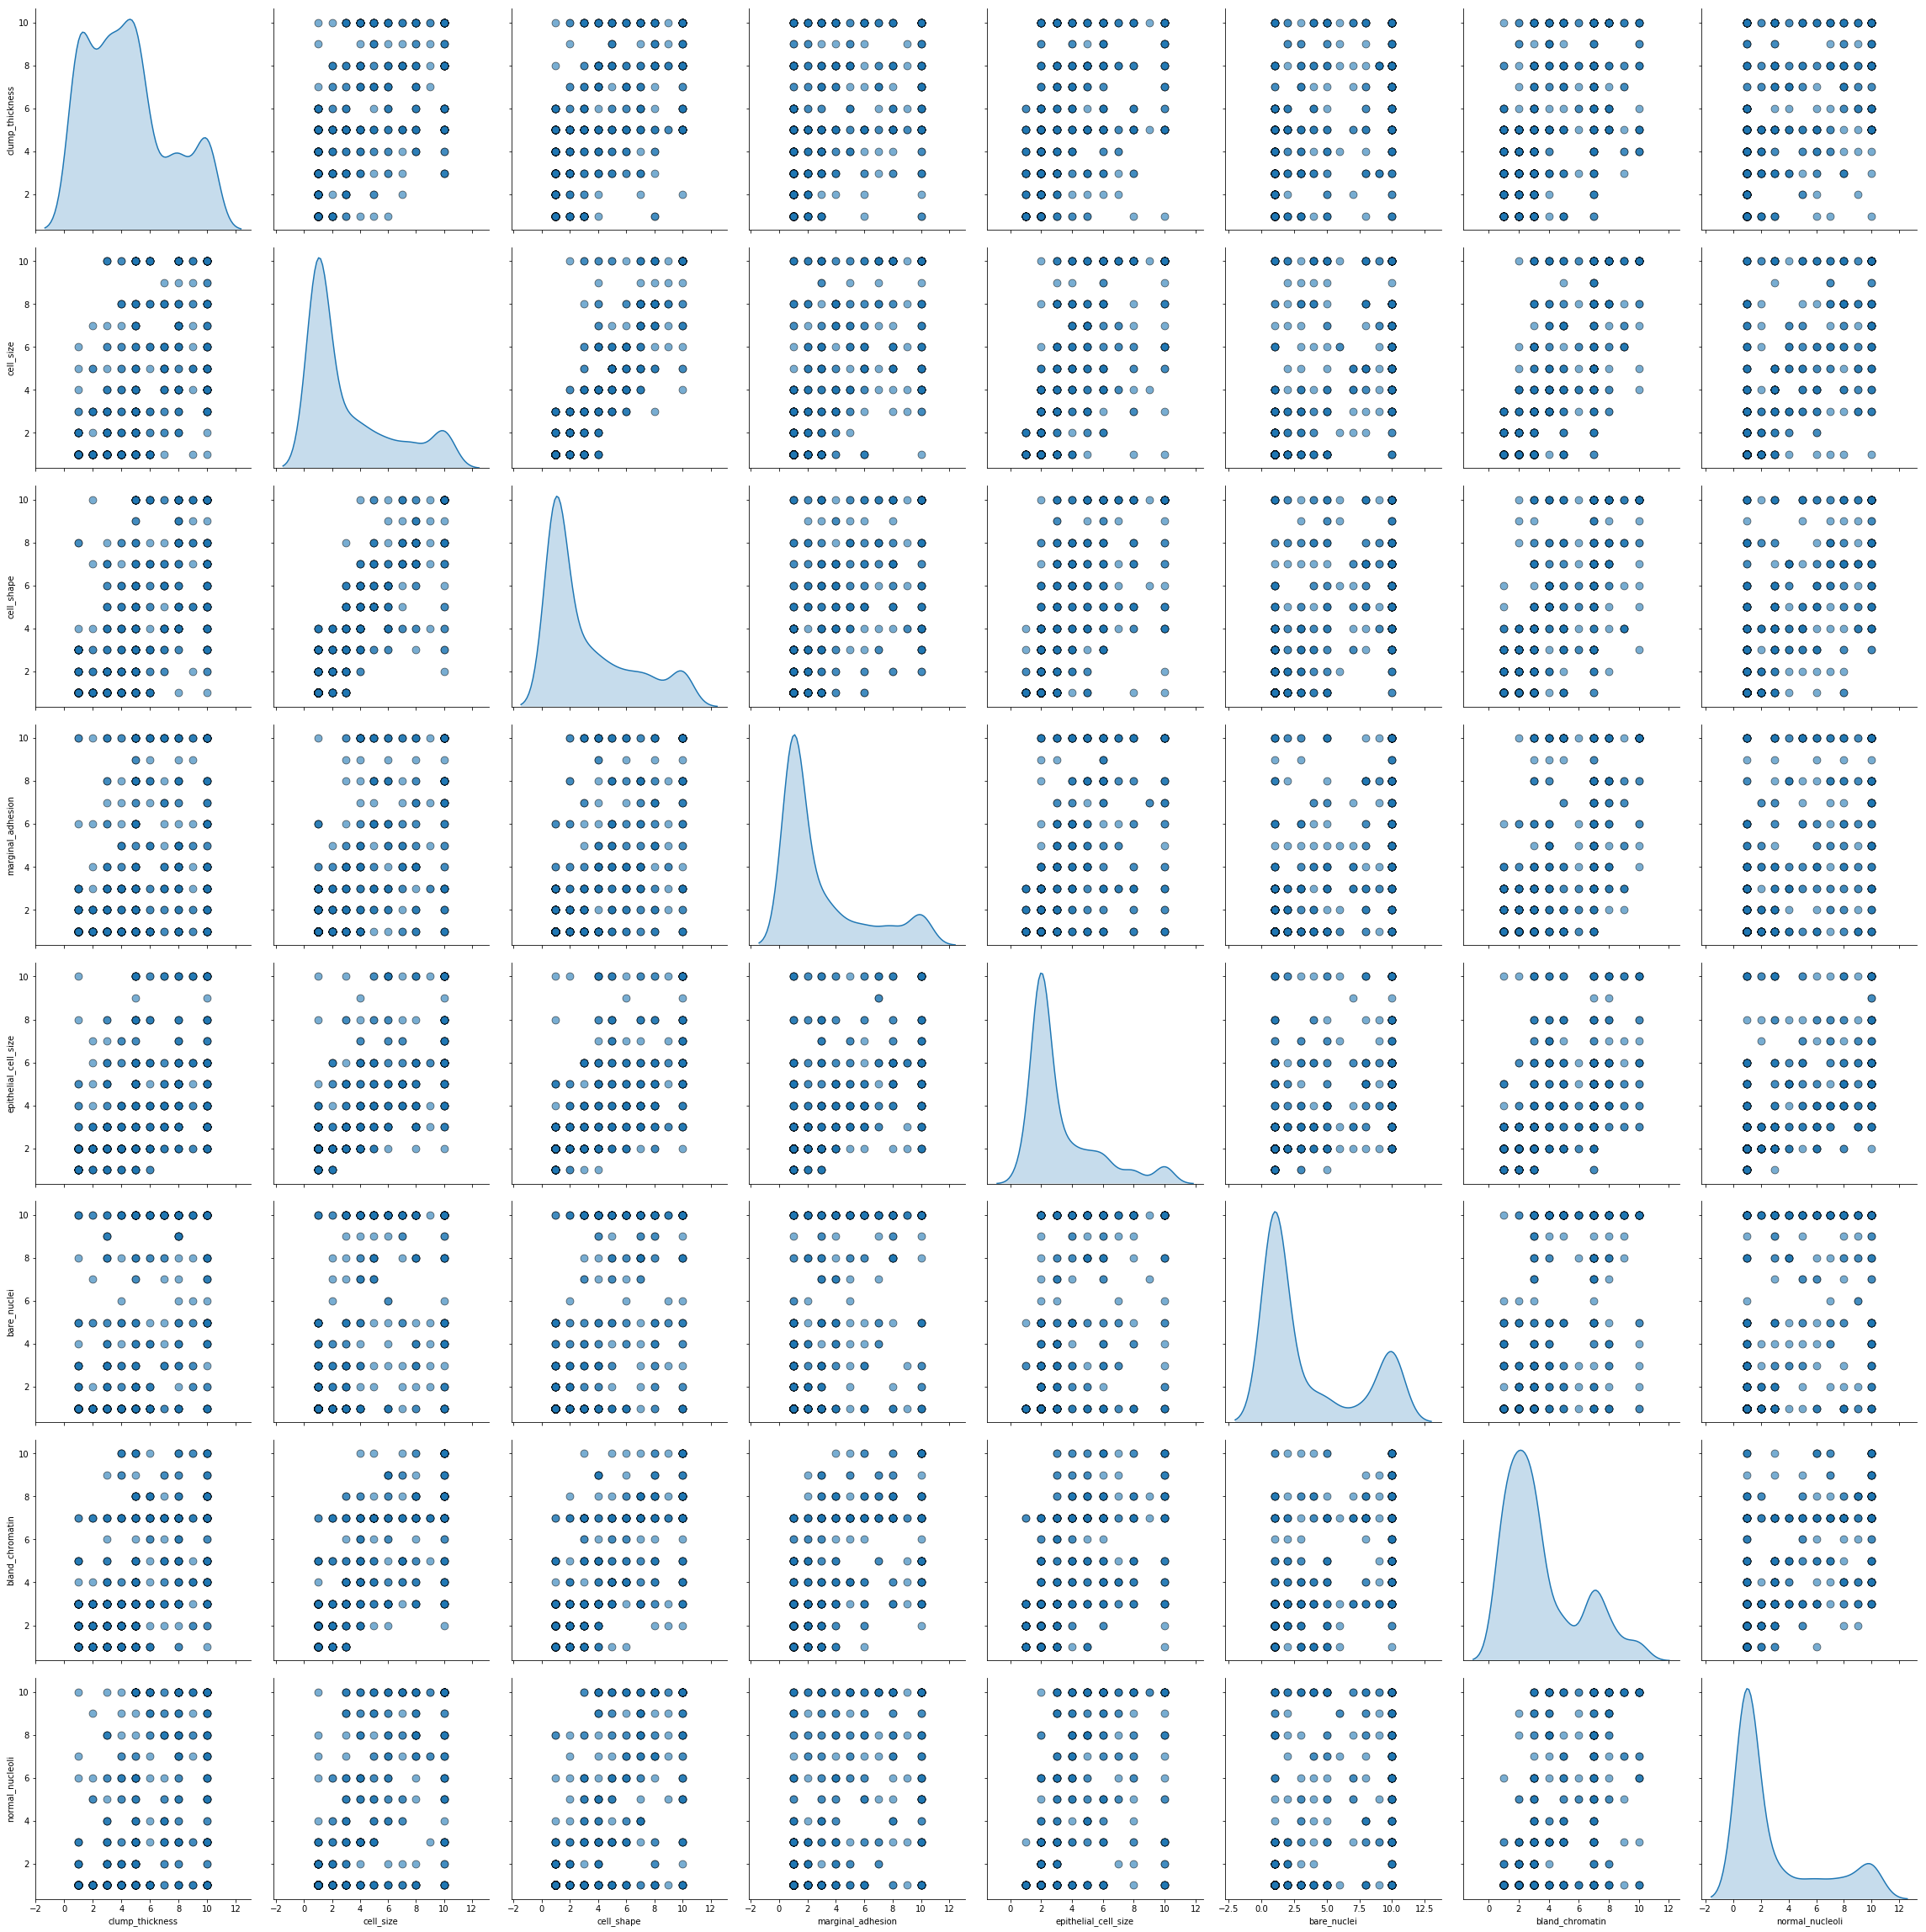

In [186]:
sns.pairplot(data[int_columns], diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4);

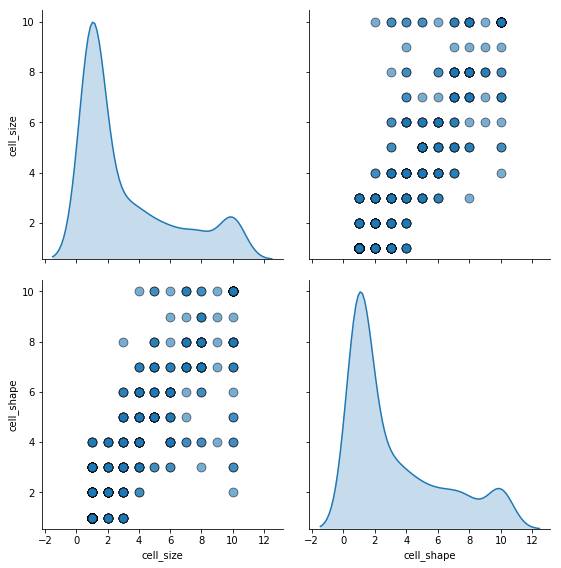

In [187]:
sns.pairplot(data[int_columns], vars = ["cell_size", "cell_shape"], diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4);

In [191]:
# Performing the logit model
import statsmodels.api as sm

# Setting up X and y
X = data[int_columns]
y = data['class']

#filling in the statsmodels Logit method
logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.382433
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  645
Model:                          Logit   Df Residuals:                      637
Method:                           MLE   Df Model:                            7
Date:                Wed, 03 Jul 2019   Pseudo R-squ.:                  0.4146
Time:                        22:22:40   Log-Likelihood:                -246.67
converged:                       True   LL-Null:                       -421.34
Covariance Type:            nonrobust   LLR p-value:                 1.706e-71
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
clump_thickness         -0.3402      0.060     -5.717      0.000      -0.457      -0.224

In [207]:
# Train, Test split
X = data.drop(["id", "class"], axis = 1)
y = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [193]:
X_train.head()
X_train.shape
X_test.head()
X_test.shape

,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
555,4,3,1,1,2,1,4,8,1
31,2,1,1,1,2,1,3,1,1
292,8,8,8,1,2,1,6,10,1
621,6,3,3,3,3,2,6,1,1
465,10,9,8,7,6,4,7,10,3


(516, 9)

,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
682,5,1,1,1,2,1,3,2,1
638,4,1,1,1,2,1,1,1,1
647,1,1,1,3,2,1,1,1,1
309,3,1,1,1,2,5,5,1,1
74,10,6,4,1,3,4,3,2,3


(129, 9)

In [194]:
y_train.head()
y_train.shape
y_test.head()
y_test.shape

555    0
31     0
292    1
621    0
465    1
Name: class, dtype: int64

(516,)

682    0
638    0
647    0
309    0
74     1
Name: class, dtype: int64

(129,)

## Logistic Regression

In [195]:
# Model training
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/upendra_35/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [196]:
# Model training
y_pred = model.predict(X_test)

In [204]:
model.predict_proba(X_test)[1:10]

array([[0.97494984, 0.02505016],
       [0.98518268, 0.01481732],
       [0.82070623, 0.17929377],
       [0.16623303, 0.83376697],
       [0.03456189, 0.96543811],
       [0.97770953, 0.02229047],
       [0.88069768, 0.11930232],
       [0.97770953, 0.02229047],
       [0.98078153, 0.01921847]])

In [140]:
# Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

In [141]:
cnf_matrix

array([[72,  1],
       [ 5, 51]])

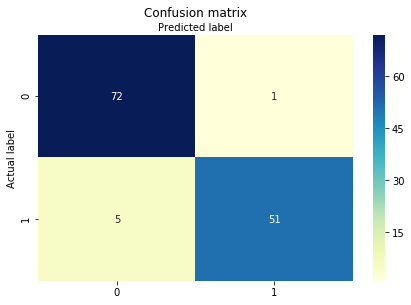

In [224]:
def plot_confusion_matrix(cm):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names);
    plt.yticks(tick_marks, class_names);
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g');
    ax.xaxis.set_label_position("top");
    plt.tight_layout();
    plt.title('Confusion matrix', y=1.1);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');

plot_confusion_matrix(cm = cnf_matrix)

In [143]:
print("Accuracy score", round(accuracy_score(y_test, y_pred) * 100, 3))
print("Precision score", round(precision_score(y_test, y_pred) * 100, 3))
print("Recall score", round(recall_score(y_test, y_pred) * 100, 3))

Accuracy score 95.349
Precision score 98.077
Recall score 91.071


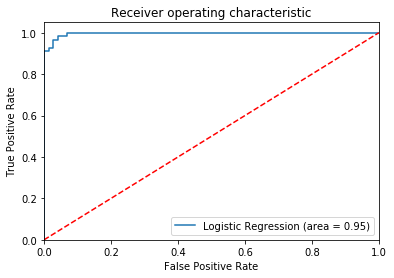

In [144]:
# ROC curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure();
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc);
plt.plot([0, 1], [0, 1],'r--');
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('Receiver operating characteristic');
plt.legend(loc="lower right");

In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        73
           1       0.98      0.91      0.94        56

   micro avg       0.95      0.95      0.95       129
   macro avg       0.96      0.95      0.95       129
weighted avg       0.95      0.95      0.95       129



## Decision Trees

In [214]:
from sklearn.tree import tree
from sklearn.ensemble import RandomForestClassifier

In [215]:
# Fitting the model
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

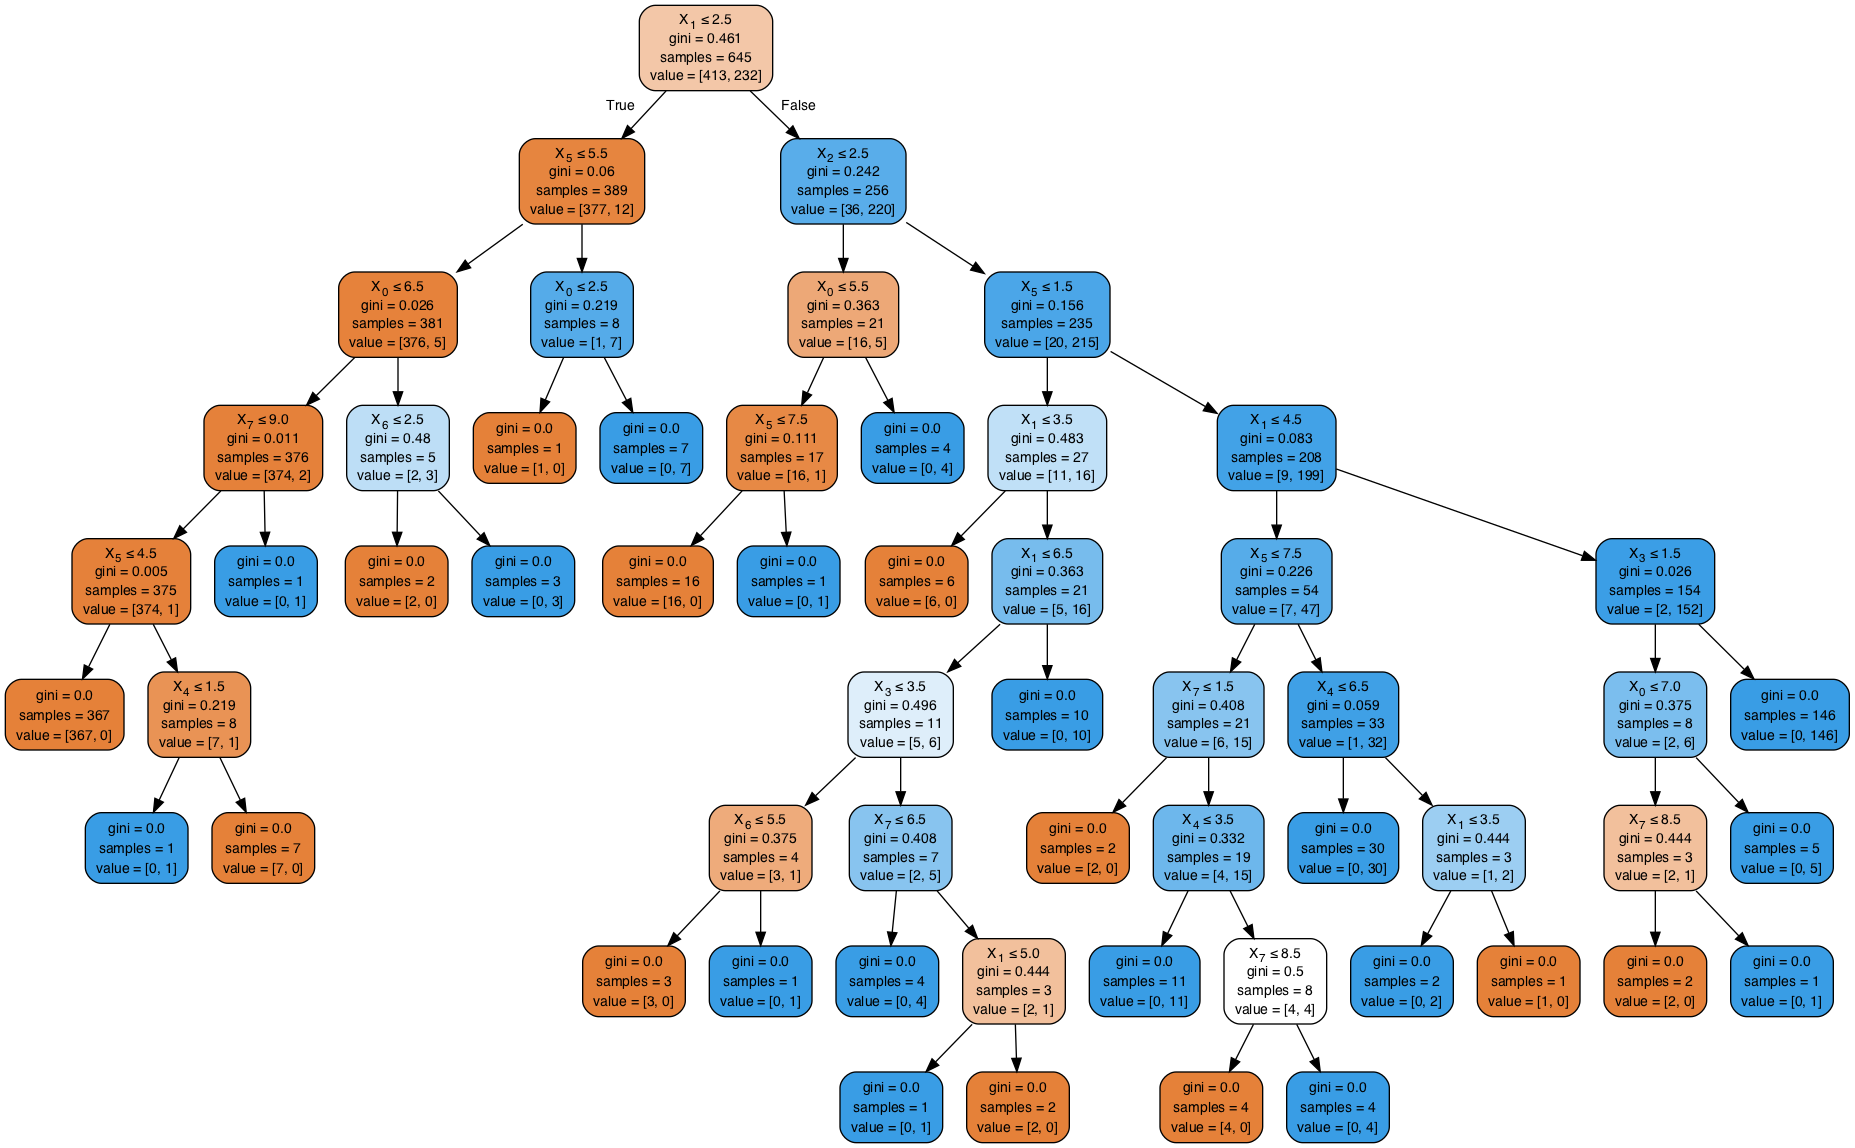

In [216]:
#Visualizing the tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Here X1 (cell size) is the root node which indicates the most important feature which agrees with Logistic Regression result (stats model) based on coefficient and p-value

## Random Forest

In [219]:
# Running new regression on training data
treeclass = RandomForestClassifier()
treeclass.fit(X_train, y_train)

# Calculating the accuracy of the model
y_pred = treeclass.predict(X_test)
y_pred_prob = treeclass.predict_proba(X_test)
accuracy = treeclass.score(X_test, y_test)
print("The accuracy is", str(accuracy * 100), '%')

/Users/upendra_35/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

The accuracy is 92.24806201550388 %


In [225]:
cm_rf = confusion_matrix(y_test, y_pred)

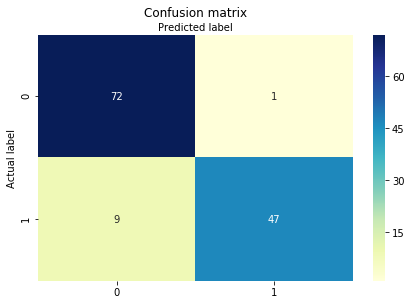

In [226]:
plot_confusion_matrix(cm = cm_rf)